### **IMPORT**

In [ ]:
!pip install yfinance
!pip install pandas-datareader

In [4]:
import yfinance as yf
import pandas_datareader as web
import matplotlib.pyplot as plt

### **Data Load(1): Yahoo Finance**

In [16]:
wtw = yf.download('WTW', start='2022-09-01', end='2023-02-01', progress=False)
wtw.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-25,251.210007,253.839996,250.570007,253.570007,253.570007,478100
2023-01-26,254.490005,255.000000,252.580002,253.500000,253.500000,403100
2023-01-27,252.570007,252.740005,250.169998,250.610001,250.610001,397500
2023-01-30,250.520004,252.330002,249.320007,249.809998,249.809998,405300
2023-01-31,250.880005,254.429993,249.460007,254.190002,254.190002,575800


In [13]:
wtw.index

DatetimeIndex(['2022-09-01', '2022-09-02', '2022-09-06', '2022-09-07',
               '2022-09-08', '2022-09-09', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15',
               ...
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23',
               '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',
               '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', name='Date', length=104, freq=None)

### **EDA(1): Yahoo Finance**
# $return = \frac{price_{end}-price_{start}}{price_{start}} = \frac{price_{end}}{price_{start}} - 1 = pct\_change()$

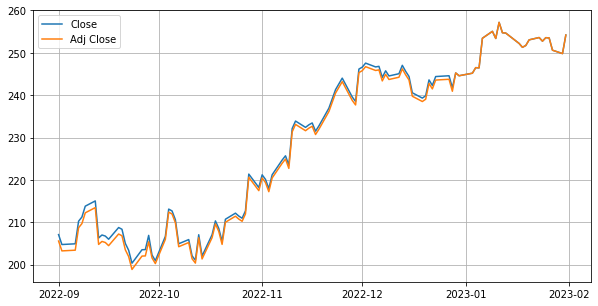

In [27]:
# Plot Close, Adj Close

plt.figure(figsize=(10,5))
plt.plot(wtw.index, wtw['Close'], label='Close')
plt.plot(wtw.index, wtw['Adj Close'], label='Adj Close')
# loc='best': 최적의 위치에 범례 생성
plt.legend(loc='best')
plt.grid()
plt.show()

In [28]:
# Returns

wtw_ret = wtw['Adj Close'].pct_change()
wtw_ret.head()

Date
2022-09-01         NaN
2022-09-02   -0.011299
2022-09-06    0.000830
2022-09-07    0.026010
2022-09-08    0.004709
Name: Adj Close, dtype: float64

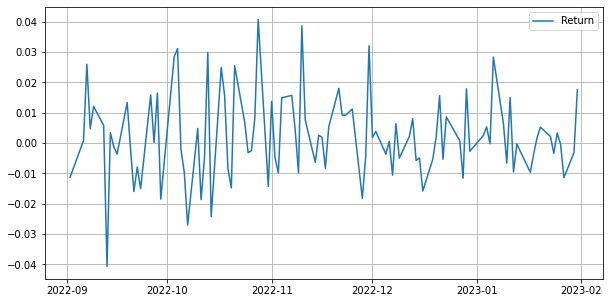

In [29]:
# Plot returns

plt.figure(figsize=(10, 5))
plt.plot(wtw.index, wtw_ret, label='Return')
plt.legend(loc='best')
plt.grid()
plt.show()

In [30]:
# Check summary statistics

wtw_ret.describe()

count    103.000000
mean       0.002160
std        0.014013
min       -0.040690
25%       -0.006039
50%        0.000830
75%        0.008892
max        0.040811
Name: Adj Close, dtype: float64

### **Data Load(2): FRED**

In [5]:
# FRED: 개별 주식 데이터보다 경제 지표 관련 데이터들이 많이있다.
# 주식시장 지수 데이터

data = web.DataReader(['SP500', 'WILL5000INDFC'], 'fred', start='2016-01-02', end='2020-09-01')
data.columns = ['S&P500', 'WilShire5000']
data.head()

,S&P500,WilShire5000
DATE,,
2016-01-04,2012.66,89.23
2016-01-05,2016.71,89.39
2016-01-06,1990.26,88.19
2016-01-07,1943.09,86.03
2016-01-08,1922.03,85.08


In [11]:
# 미국 부동산 지수 데이터

cs = web.DataReader('CSUSHPINSA', 'fred', start='1990-01-01', end='2020-09-01')
cs.head()

,CSUSHPINSA
DATE,
1990-01-01,76.527
1990-02-01,76.587
1990-03-01,76.790
1990-04-01,77.038
1990-05-01,77.296


### **EDA(2): FRED**

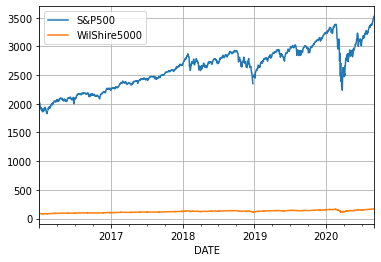

In [7]:
# 두개의 값 차이가 많이 나기 때문에 이런식의 비교는 큰 의미가 없다.

data.plot()
plt.legend(loc='best')
plt.grid()
plt.show()

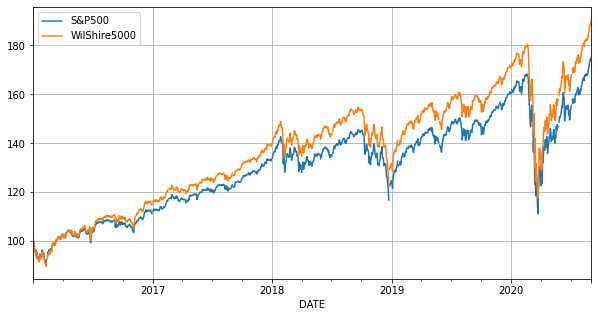

In [8]:
# Plot after scale

(data / data.iloc[0] * 100).plot(figsize=(10,5))
plt.legend(loc='best')
plt.grid()
plt.show()

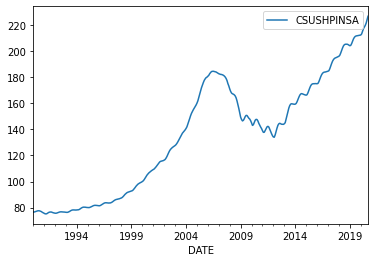

In [15]:
cs.plot()

### **Data Load(3): FamaFrench**

In [14]:
# 미국 주식시장에서 거래되고있는 모든 주식들을 5개의 산업군으로 분류한 데이터

ind = web.DataReader('5_industry_Portfolios', 'famafrench', start='2000-01-01', end='2020-09-01')
print(ind['DESCR'])

5 industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 202212 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2022 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (249 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (249 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (21 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (21 rows x 5 cols)
  4 : Number of Firms in Portfolios (249 rows x 5 cols)
  5 : Average Firm Size (249 rows x 5 cols)
  6 : Sum of BE / Sum of ME (21 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (21 rows x 5 cols)


In [18]:
(ind[0]/100).head()

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
2000-01,-0.0795,-0.0496,-0.0454,0.0754,-0.0469
2000-02,-0.0511,-0.0475,0.1329,-0.0292,-0.0712
2000-03,0.1103,0.0819,0.0464,0.0030,0.1408
2000-04,-0.0204,0.0157,-0.1013,0.0528,-0.0312
2000-05,-0.0057,0.0131,-0.1076,0.0395,0.0340


### **EDA(4): FamaFrench**

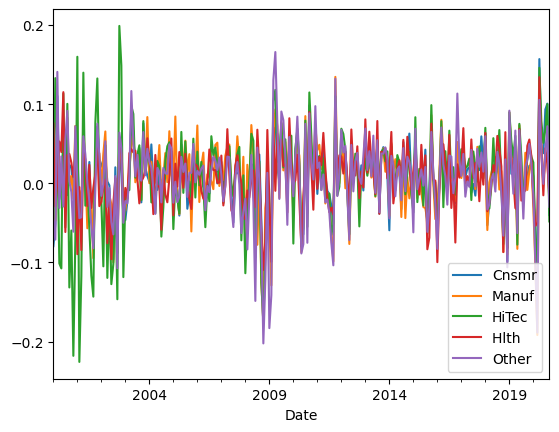

In [20]:
(ind[0]/100).plot()

### **Data Load(4): Data load in naver**

In [21]:
df = web.DataReader('005930', 'naver', start='2018-01-01', end='2020-09-01')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,51380,51400,50780,51020,169485
2018-01-03,52540,52560,51420,51620,200270
2018-01-04,52120,52180,50640,51080,233909
2018-01-05,51300,52120,51200,52120,189623
2018-01-08,52400,52520,51500,52020,167673


In [28]:
df['Close'] = df['Close'].astype(float)

### **EDA(4): Data load in naver**

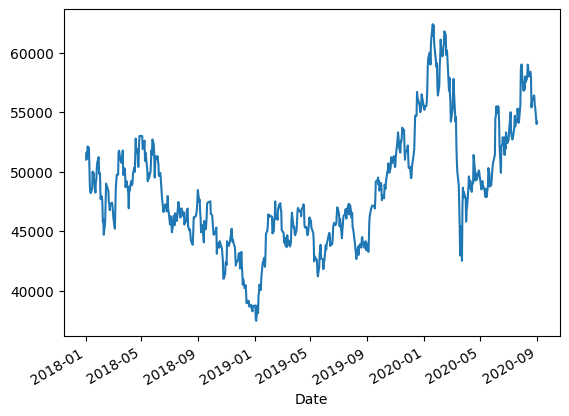

In [29]:
df['Close'].plot()